In [1]:
import os
import numpy as np
import pandas as pd
from plt_rce import *
import hds

In [2]:
os.getcwd()

'/Users/taehyunan/Desktop/Repo/SeSAC/Study/sesac_ml_dl_study_repo/project/code'

In [3]:
os.chdir('../data')

In [4]:
sorted(os.listdir())

['APT_Data_Prep.csv',
 'APT_Detail_Seoul_2024.csv',
 'APT_Detail_Seoul_2024.xlsx',
 'APT_Price.pkl',
 'APT_Price_Seoul_Merged_2020~2024.csv',
 'APT_Price_Seoul_Merged_2020~2024.xlsx',
 'APT_Price_Seoul_Split_2020.csv',
 'APT_Price_Seoul_Split_2020~2024.xlsx',
 'APT_Price_Seoul_Split_2021.csv',
 'APT_Price_Seoul_Split_2022.csv',
 'APT_Price_Seoul_Split_2023.csv',
 'APT_Price_Seoul_Split_2024.csv',
 'Marine_Product.csv',
 'Marine_Product.pkl',
 'Marine_Product.xlsx',
 'NA_Sample.xlsx',
 'Used_Cars.csv',
 'Used_Cars.pkl',
 'Used_Cars.xlsx']

In [5]:
[file for file in sorted(os.listdir()) if 'Used' in file]

['Used_Cars.csv', 'Used_Cars.pkl', 'Used_Cars.xlsx']

In [6]:
df = pd.read_pickle('Used_Cars.pkl')

In [7]:
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1274
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1273 non-null   int64 
 1   Age        1273 non-null   int64 
 2   KM         1273 non-null   int64 
 3   FuelType   1273 non-null   object
 4   HP         1273 non-null   int64 
 5   MetColor   1273 non-null   object
 6   Automatic  1273 non-null   object
 7   CC         1273 non-null   int64 
 8   Doors      1273 non-null   int64 
 9   Weight     1273 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 109.4+ KB


In [9]:
df.describe().round(3)

,Price,Age,KM,HP,CC,Doors,Weight
count,1273.000,1273.000,1273.000,1273.000,1273.000,1273.000,1273.000
mean,9694.106,60.599,73808.185,100.397,1559.135,3.998,1062.496
std,2029.053,13.695,35858.989,13.115,184.418,0.951,39.409
min,4350.000,19.000,5309.000,69.000,1300.000,2.000,1000.000
25%,8250.000,51.000,49000.000,86.000,1400.000,3.000,1035.000
50%,9450.000,63.000,67660.000,110.000,1600.000,4.000,1060.000
75%,10950.000,71.000,90345.000,110.000,1600.000,5.000,1075.000
max,15950.000,80.000,243000.000,116.000,2000.000,5.000,1615.000


## 목표변수 분포 확인

In [13]:
plt.rc(group='figure', figsize=(4, 4))

In [14]:
df['Price'].agg(func=['min', 'max'])

min     4350
max    15950
Name: Price, dtype: int64

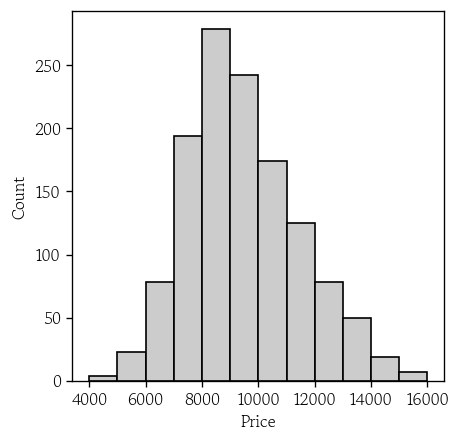

In [ ]:
sns.histplot(
    df, x='Price', binrange=[4000, 16000],
    binwidth=1000, facecolor='0.8'
)

plt.show()

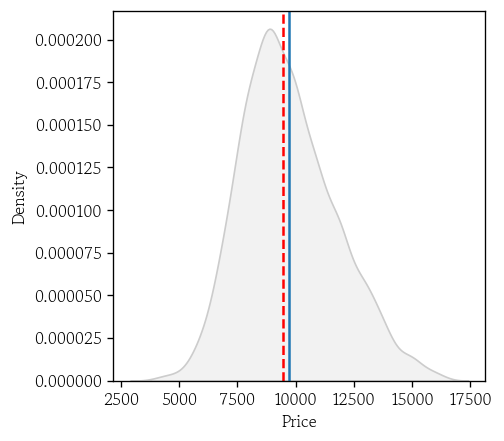

In [19]:
sns.kdeplot(
    df, x='Price',
    fill=True, color='0.8'
)

plt.axvline(df['Price'].mean())
plt.axvline(df['Price'].median(), color='red', linestyle='--')

plt.show()

## 연속형 변수 간 상관관계 확인

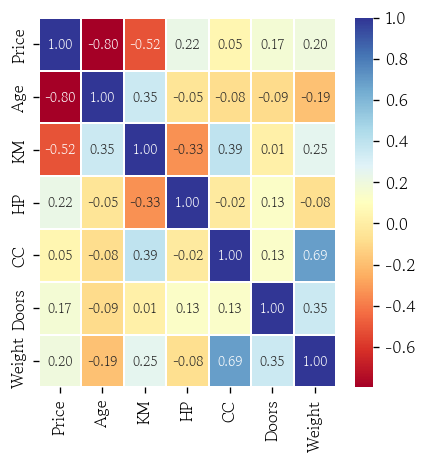

In [24]:
corr = df.corr(numeric_only=True)
sns.heatmap(
    corr, annot=True, fmt='.2f',
    annot_kws={'size': 8},
    cmap='RdYlBu', linewidths=1
)

plt.show()

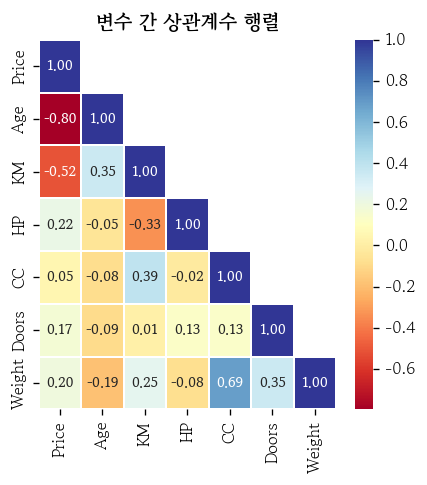

In [25]:
hds.plot.corr_heatmap(df)

## 연속형 입력변수와 관계 확인

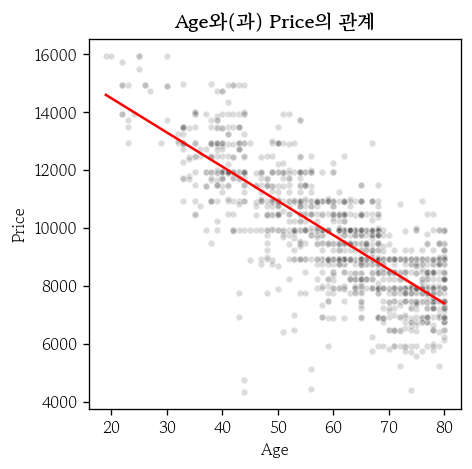

In [26]:
hds.plot.regline(
    df, x='Age', y='Price'
)

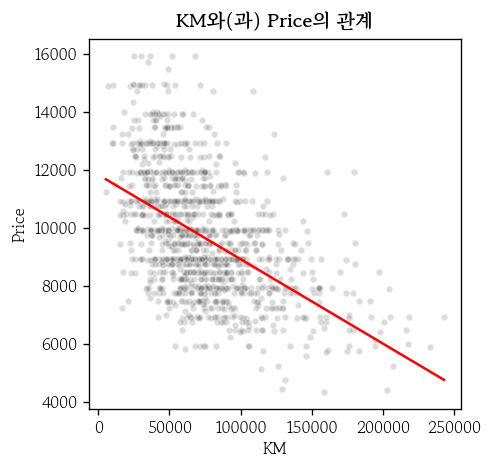

In [27]:
hds.plot.regline(
    df, x='KM', y='Price'
)

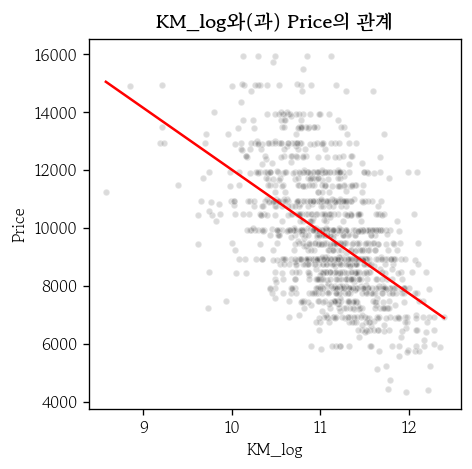

In [28]:
df1 = df.copy()
df1['KM_log'] = np.log(df1['KM'])

hds.plot.regline(
    df1, x='KM_log', y='Price'
)

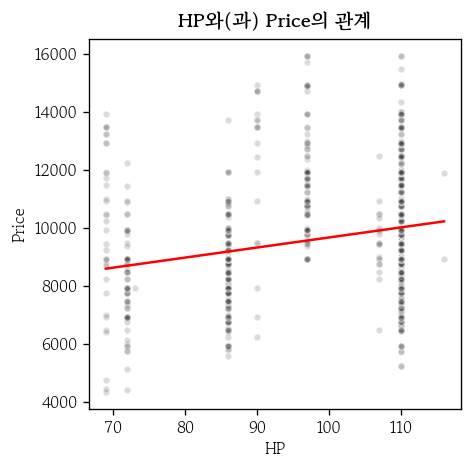

In [29]:
hds.plot.regline(
    df, x='HP', y='Price'
)

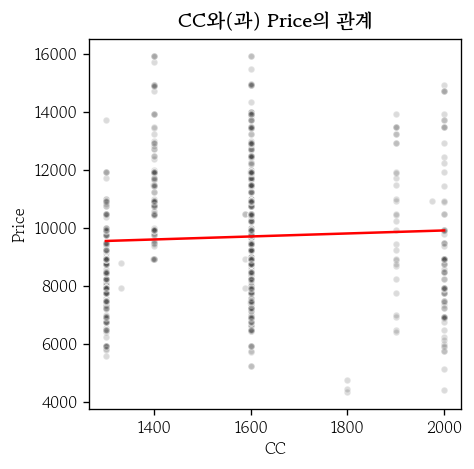

In [30]:
hds.plot.regline(
    df, x='CC', y='Price'
)

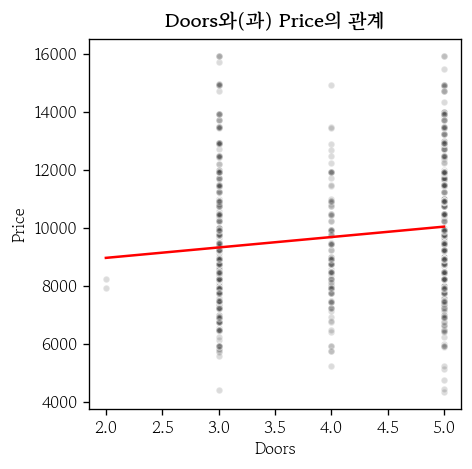

In [31]:
hds.plot.regline(
    df, x='Doors', y='Price'
)

In [32]:
df['Doors'].value_counts().sort_index()

Doors
2      2
3    571
4    128
5    572
Name: count, dtype: int64

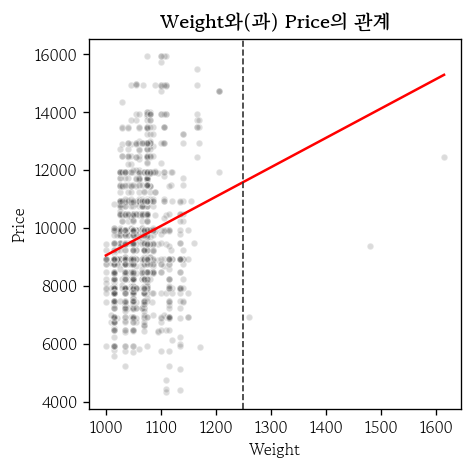

In [35]:
hds.plot.regline(
    df, x='Weight', y='Price'
)

plt.axvline(
    x=1250, ls='--', lw=1, color='0.2'
)

## 범주형 입력변수와 관계 확인

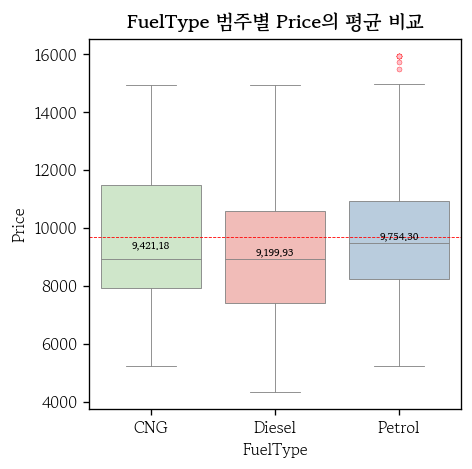

In [37]:
hds.plot.box_group(
    df, x='FuelType', y='Price',
    palette='Pastel1'
)

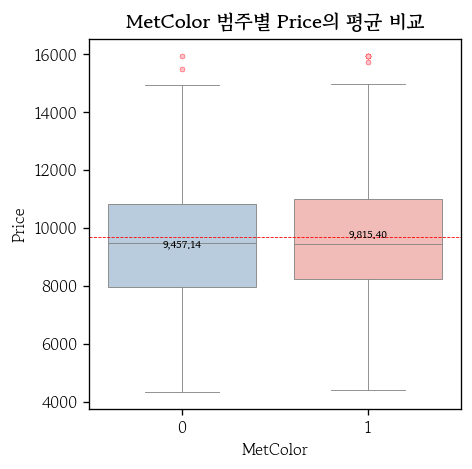

In [38]:
hds.plot.box_group(
    df, x='MetColor', y='Price',
    palette='Pastel1'
)

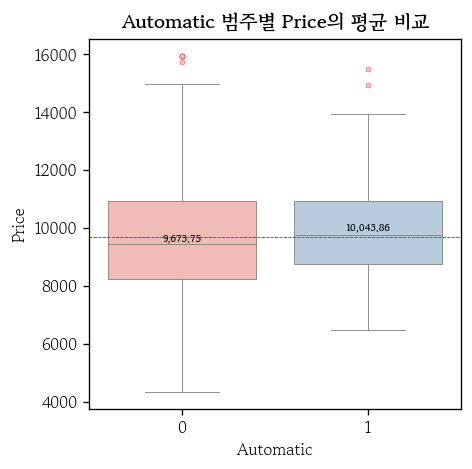

In [39]:
hds.plot.box_group(
    df, x='Automatic', y='Price',
    palette='Pastel1'
)

## 불필요한 행 삭제

In [ ]:
cond1 = df['Doors'].ne(2)
cond2 = df['Weight'].le(1250)

df = df.loc[cond1 & cond2, :]
df = df.reset_index(drop=True)
df.shape

(1268, 10)

In [42]:
os.getcwd()

'/Users/taehyunan/Desktop/Repo/SeSAC/Study/sesac_ml_dl_study_repo/project/data'

## 외부 파일로 저장
- df.to_pickle() : 데이터프레임 하나를 pickle 파일로 저장
- pd.to_pickle(obj, filepath_or_buffer) : obj 매개변수에 지정한 파이썬 객체를 pickle 파일로 저장
    - 여러 객체를 하나의 pickle 파일로 저장

In [43]:
pd.to_pickle(obj=df, filepath_or_buffer='Used_Cars.pkl')

In [45]:
sorted(os.listdir())

['APT_Data_Prep.csv',
 'APT_Detail_Seoul_2024.csv',
 'APT_Detail_Seoul_2024.xlsx',
 'APT_Price.pkl',
 'APT_Price_Seoul_Merged_2020~2024.csv',
 'APT_Price_Seoul_Merged_2020~2024.xlsx',
 'APT_Price_Seoul_Split_2020.csv',
 'APT_Price_Seoul_Split_2020~2024.xlsx',
 'APT_Price_Seoul_Split_2021.csv',
 'APT_Price_Seoul_Split_2022.csv',
 'APT_Price_Seoul_Split_2023.csv',
 'APT_Price_Seoul_Split_2024.csv',
 'Marine_Product.csv',
 'Marine_Product.pkl',
 'Marine_Product.xlsx',
 'NA_Sample.xlsx',
 'Used_Cars.csv',
 'Used_Cars.pkl',
 'Used_Cars.xlsx']